In [1]:
import numpy as np
import scipy.io
import scipy
import matplotlib.pyplot as plt

(800,)


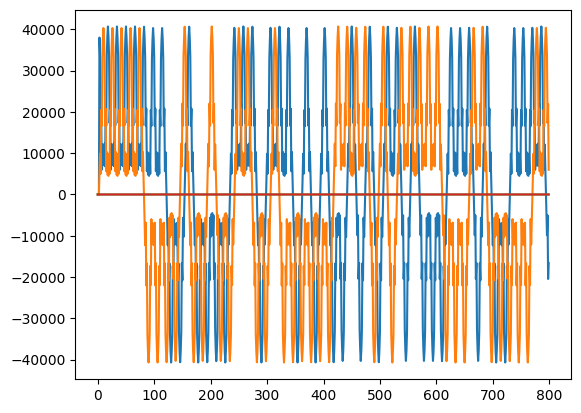

In [2]:
def applyPolyCoefComplex(x, coefMat):
    degLen=5
    memLen=3
    memLenM1=memLen-1
    coefMatTrans=coefMat.transpose()
    coeftMatReshaped = coefMatTrans.reshape((-1))
    xLen=x.shape[0]
    y=np.zeros_like(x)
    for timeIdx in range(memLen, xLen):
        xTerms=np.zeros((memLen*degLen), dtype=np.complex_)
        xTime=x[timeIdx-memLen: timeIdx]
        xTime=np.flipud(xTime)
        xTerms[:memLen] = xTime[:]
        for degIdx in range(1, degLen):
            degIdxM1=degIdx-1
            startPos = degIdx*memLen
            endPos = startPos+memLen
            tmp=np.abs(xTime)**degIdxM1
            xTerms[startPos:endPos] = xTime[:]*tmp[:]
        y_tmp=coeftMatReshaped*xTerms
        y[timeIdx] = sum(y_tmp)
    return y

# x=scipy.io.loadmat("../DataProcessing/in_SDRPolynomial")['x'].reshape(-1)
# print(x.shape)

# for label in range(1):
#     outFitfile = './outFitMatlab/outFitAll_0.25meters_label'+str(label)+'_all300' 
#     outFitAll = scipy.io.loadmat(outFitfile)['outFitAll']
#     coefMathfile = './outFitMatlab/fitCoefMatAll_0.25meters_label'+str(label)+'_all300' 
#     coefMathAll = scipy.io.loadmat(coefMathfile)['fitCoefMatAll']
#     for sigIdx in range(1): #outFitAll.shape[0]):
#         outFit = outFitAll[sigIdx]
#         coefMat = coefMathAll[sigIdx]
#         outFitCustom = applyPolyCoefComplex(x, coefMat)
#         plt.plot(np.real(outFitCustom))
#         plt.plot(np.imag(outFitCustom))
#         plt.plot(np.real(x))
#         plt.plot(np.imag(x))